In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading dataset

In [2]:
data = pd.read_csv(r"C:\Users\posah\Desktop\TRESURE\PROJECT DATA SCIENCE\lavs\Tweets.csv")
data = data[:5443]

# Data Analysis

In [3]:
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
data.describe()

,textID,text,selected_text,sentiment
count,5443,5442,5442,5443
unique,5443,5442,4756,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,34,2200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5443 entries, 0 to 5442
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         5443 non-null   object
 1   text           5442 non-null   object
 2   selected_text  5442 non-null   object
 3   sentiment      5443 non-null   object
dtypes: object(4)
memory usage: 170.2+ KB


In [6]:
data.shape

(5443, 4)

# Checking for null values

In [7]:
data.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

# Checking for duplicates

In [10]:
data.duplicated().sum()

0

# Data Visualization

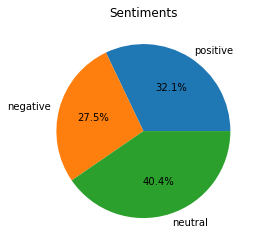

In [11]:
dic = {'positive':0,'negative':0,'neutral':0}
for i in data['sentiment']:
    dic[i] = dic[i] + 1
plt.title('Sentiments')
plt.pie(dic.values(),labels=dic.keys(),autopct='%1.1f%%')
plt.show()

# Data Preprocessing

In [12]:
import re
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

C:\Users\posah\anacondap\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
lm = WordNetLemmatizer()
sw = stopwords.words('english')

In [14]:
def pre_processing(tweets):
    processed_tweets = []
    for i in tweets:
        p = re.sub(r'http\S+|www\S+|@\w+', ' ', i)      #removing links and mentions
        p = re.sub(r'[^A-Za-z]',' ',p)                  #removing special characters and numbers
        p = p.lower()                                   #lowercasing
        p = word_tokenize(p)                            #tokenization
        p = [i for i in p if i not in sw]               #removing stopwords
        p = [lm.lemmatize(i) for i in p]                #lemmatization
        p = ' '.join(p)
        processed_tweets.append(p)
    return processed_tweets

In [15]:
pro_tweet = pre_processing(data['text'])
print("Twitter Tweets Pre-processing Done")

Twitter Tweets Pre-processing Done


In [16]:
emotion_float = []
for i in data['sentiment']:
    if i == 'positive':
        emotion_float.append(1.0)
    elif i=='negative':
        emotion_float.append(0.0)
    else:
        emotion_float.append(2.0)
data['sentiment_float'] = emotion_float

# Transforming the words into vectors using tf-idf

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tf_idf = TfidfVectorizer()
features = tf_idf.fit_transform(pro_tweet).toarray()
print(features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# X & Y array

In [19]:
x = features
y = data.iloc[:,-1]
print(x.shape,y.shape)
print(type(x),type(y))

(5442, 8102) (5442,)
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


# MODI SPLITING DATA INTO TRAINING AND TESTING

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4081, 8102)
(1361, 8102)
(4081,)
(1361,)


In [21]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
y

0       2.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5438    1.0
5439    2.0
5440    1.0
5441    2.0
5442    2.0
Name: sentiment_float, Length: 5442, dtype: float64

# MODEL TRAINING

## MODI

1. `Multinomial Naive Bayes`

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [25]:
mnb_pred = mnb.predict(x_test)
mnb_pred

array([2., 2., 2., ..., 2., 2., 2.])

In [26]:
print('Training Score : ',mnb.score(x_train,y_train))
print('Testing Score  : ',mnb.score(x_test,y_test))

Training Score :  0.8434207302131831
Testing Score  :  0.5892725936811168


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [28]:
mnb_acc = accuracy_score(y_test,mnb_pred)
mnb_pr  = precision_score(y_test,mnb_pred,average='macro')
mnb_rec = recall_score(y_test,mnb_pred,average='macro')
mnb_f1  = f1_score(y_test,mnb_pred,average='macro')
print('Accuracy by MNB  : ', mnb_acc)
print('Precision by MNB : ', mnb_pr)
print('Recall by MNB    : ', mnb_rec)
print('F1 score by MNB  : ', mnb_f1)

Accuracy by MNB  :  0.5892725936811168
Precision by MNB :  0.6621758294003751
Recall by MNB    :  0.5573607722568169
F1 score by MNB  :  0.5571878832270701


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(confusion_matrix(y_test,mnb_pred))
print(classification_report(y_test,mnb_pred))

[[101  25 251]
 [  7 266 167]
 [ 23  86 435]]
              precision    recall  f1-score   support

         0.0       0.77      0.27      0.40       377
         1.0       0.71      0.60      0.65       440
         2.0       0.51      0.80      0.62       544

    accuracy                           0.59      1361
   macro avg       0.66      0.56      0.56      1361
weighted avg       0.65      0.59      0.57      1361



2. `Gaussian Navies Bayes`

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [33]:
gnb_pred = gnb.predict(x_test)
gnb_pred

array([0., 2., 2., ..., 2., 2., 2.])

In [34]:
print("Training Score : ",gnb.score(x_train,y_train))
print("Testing Score  : ",gnb.score(x_test,y_test))

Training Score :  0.8321489830923793
Testing Score  :  0.3894195444526084


In [35]:
gnb_acc = accuracy_score(y_test,gnb_pred)
gnb_pr  = precision_score(y_test,gnb_pred,average='macro')
gnb_rec = recall_score(y_test,gnb_pred,average='macro')
gnb_f1  = f1_score(y_test,gnb_pred,average='macro')
print('Accuracy by gnb  : ', gnb_acc)
print('Precision by gnb : ', gnb_pr)
print('Recall by gnb    : ', gnb_rec)
print('F1 score by gnb  : ', gnb_f1)

Accuracy by gnb  :  0.3894195444526084
Precision by gnb :  0.40151290211696655
Recall by gnb    :  0.41124454483987954
F1 score by gnb  :  0.3876467131446976


In [36]:
print(confusion_matrix(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))

[[221  69  87]
 [150 183 107]
 [283 135 126]]
              precision    recall  f1-score   support

         0.0       0.34      0.59      0.43       377
         1.0       0.47      0.42      0.44       440
         2.0       0.39      0.23      0.29       544

    accuracy                           0.39      1361
   macro avg       0.40      0.41      0.39      1361
weighted avg       0.40      0.39      0.38      1361



3. `Logistic Regression`

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [39]:
lr_pred = lr.predict(x_test)
lr_pred

array([0., 1., 2., ..., 2., 2., 2.])

In [40]:
print("Training Score : ",lr.score(x_train,y_train))
print("Testing Score  : ",lr.score(x_test,y_test))

Training Score :  0.8772359715755942
Testing Score  :  0.630418809698751


In [41]:
lr_acc = accuracy_score(y_test,lr_pred)
lr_pr  = precision_score(y_test,lr_pred,average='macro')
lr_rec = recall_score(y_test,lr_pred,average='macro')
lr_f1  = f1_score(y_test,lr_pred,average='macro')
print('Accuracy by lr  : ', lr_acc)
print('Precision by lr : ', lr_pr)
print('Recall by lr    : ', lr_rec)
print('F1 score by lr  : ', lr_f1)

Accuracy by lr  :  0.630418809698751
Precision by lr :  0.6694441134365103
Recall by lr    :  0.6078700584405453
F1 score by lr  :  0.6171773425391031


In [42]:
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

[[158  28 191]
 [ 16 271 153]
 [ 47  68 429]]
              precision    recall  f1-score   support

         0.0       0.71      0.42      0.53       377
         1.0       0.74      0.62      0.67       440
         2.0       0.55      0.79      0.65       544

    accuracy                           0.63      1361
   macro avg       0.67      0.61      0.62      1361
weighted avg       0.66      0.63      0.62      1361



4. `KNN`

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [45]:
knn_pred = knn.predict(x_test)
knn_pred

array([2., 2., 2., ..., 2., 2., 2.])

In [46]:
print("Training Score : ",knn.score(x_train,y_train))
print("Testing Score  : ",knn.score(x_test,y_test))

Training Score :  0.43420730213183045
Testing Score  :  0.42321822189566494


In [47]:
knn_acc = accuracy_score(y_test,knn_pred)
knn_pr  = precision_score(y_test,knn_pred,average='macro')
knn_rec = recall_score(y_test,knn_pred,average='macro')
knn_f1  = f1_score(y_test,knn_pred,average='macro')
print('Accuracy by knn  : ', knn_acc)
print('Precision by knn : ', knn_pr)
print('Recall by knn    : ', knn_rec)
print('F1 score by knn  : ', knn_f1)

Accuracy by knn  :  0.42321822189566494
Precision by knn :  0.725004997525815
Recall by knn    :  0.3589146654562476
F1 score by knn  :  0.24572945538054025


In [48]:
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

[[  6   0 371]
 [  0  30 410]
 [  1   3 540]]
              precision    recall  f1-score   support

         0.0       0.86      0.02      0.03       377
         1.0       0.91      0.07      0.13       440
         2.0       0.41      0.99      0.58       544

    accuracy                           0.42      1361
   macro avg       0.73      0.36      0.25      1361
weighted avg       0.69      0.42      0.28      1361



5. `SVM`

In [49]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [50]:
svm_pred = svm.predict(x_test)
svm_pred

array([0., 1., 2., ..., 2., 2., 1.])

In [51]:
print("Training Score : ",svm.score(x_train,y_train))
print("Testing Score  : ",svm.score(x_test,y_test))

Training Score :  0.8946336682185739
Testing Score  :  0.6385011021307861


In [52]:
svm_acc = accuracy_score(y_test,svm_pred)
svm_pr  = precision_score(y_test,svm_pred,average='macro')
svm_rec = recall_score(y_test,svm_pred,average='macro')
svm_f1  = f1_score(y_test,svm_pred,average='macro')
print('Accuracy by svm  : ', svm_acc)
print('Precision by svm : ', svm_pr)
print('Recall by svm    : ', svm_rec)
print('F1 score by svm  : ', svm_f1)

Accuracy by svm  :  0.6385011021307861
Precision by svm :  0.6756128837887777
Recall by svm    :  0.617179705858712
F1 score by svm  :  0.6275224987480009


In [53]:
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))

[[168  22 187]
 [ 20 270 150]
 [ 51  62 431]]
              precision    recall  f1-score   support

         0.0       0.70      0.45      0.55       377
         1.0       0.76      0.61      0.68       440
         2.0       0.56      0.79      0.66       544

    accuracy                           0.64      1361
   macro avg       0.68      0.62      0.63      1361
weighted avg       0.67      0.64      0.63      1361



6. `Decision Tree`

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
dt_pred = dt.predict(x_test)
dt_pred

array([0., 1., 2., ..., 1., 0., 1.])

In [56]:
print("Training Score : ",dt.score(x_train,y_train))
print("Testing Score  : ",dt.score(x_test,y_test))

Training Score :  0.9975496201911296
Testing Score  :  0.6113152094048494


In [57]:
dt_acc = accuracy_score(y_test,dt_pred)
dt_pr  = precision_score(y_test,dt_pred,average='macro')
dt_rec = recall_score(y_test,dt_pred,average='macro')
dt_f1  = f1_score(y_test,dt_pred,average='macro')
print('Accuracy by dt  : ', dt_acc)
print('Precision by dt : ', dt_pr)
print('Recall by dt    : ', dt_rec)
print('F1 score by dt  : ', dt_f1)

Accuracy by dt  :  0.6113152094048494
Precision by dt :  0.6116909622042515
Recall by dt    :  0.609493456171955
F1 score by dt  :  0.6096785947866044


In [58]:
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

[[204  47 126]
 [ 35 306  99]
 [ 99 123 322]]
              precision    recall  f1-score   support

         0.0       0.60      0.54      0.57       377
         1.0       0.64      0.70      0.67       440
         2.0       0.59      0.59      0.59       544

    accuracy                           0.61      1361
   macro avg       0.61      0.61      0.61      1361
weighted avg       0.61      0.61      0.61      1361



7. `Random Forest`

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [60]:
rf_pred = rf.predict(x_test)
rf_pred

array([0., 1., 2., ..., 2., 2., 1.])

In [61]:
print("Training Score : ",rf.score(x_train,y_train))
print("Testing Score  : ",rf.score(x_test,y_test))

Training Score :  0.9975496201911296
Testing Score  :  0.633357825128582


In [62]:
rf_acc = accuracy_score(y_test,rf_pred)
rf_pr  = precision_score(y_test,rf_pred,average='macro')
rf_rec = recall_score(y_test,rf_pred,average='macro')
rf_f1  = f1_score(y_test,rf_pred,average='macro')
print('Accuracy by rf  : ', rf_acc)
print('Precision by rf : ', rf_pr)
print('Recall by rf    : ', rf_rec)
print('F1 score by rf  : ', rf_f1)


Accuracy by rf  :  0.633357825128582
Precision by rf :  0.6713199434629332
Recall by rf    :  0.6119688754450417
F1 score by rf  :  0.6206513345351109


In [63]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[155  27 195]
 [ 11 288 141]
 [ 48  77 419]]
              precision    recall  f1-score   support

         0.0       0.72      0.41      0.52       377
         1.0       0.73      0.65      0.69       440
         2.0       0.55      0.77      0.65       544

    accuracy                           0.63      1361
   macro avg       0.67      0.61      0.62      1361
weighted avg       0.66      0.63      0.63      1361



# Model Selection

In [64]:
x1 = {'Accuracy':[mnb_acc,gnb_acc,lr_acc,knn_acc,svm_acc,dt_acc,rf_acc],
      'Precision (mean)':[mnb_pr,gnb_pr,lr_pr,knn_pr,svm_pr,dt_pr,rf_pr],
      'Recall (mean)':[mnb_rec,gnb_rec,lr_rec,knn_rec,svm_rec,dt_rec,rf_rec],
      'F1-Score (mean)':[mnb_f1,gnb_f1,lr_f1,knn_f1,svm_f1,dt_f1,rf_f1]}
x2 = ['Multinomial Navies Bayes','Gaussian Navies Bayes','Logistic Regression',
           'K-NearestNeighbors','Support Vector Machine','Decision Tree','Random Forest']
df = pd.DataFrame(x1,x2)
df

,Accuracy,Precision (mean),Recall (mean),F1-Score (mean)
Multinomial Navies Bayes,0.589273,0.662176,0.557361,0.557188
Gaussian Navies Bayes,0.389420,0.401513,0.411245,0.387647
Logistic Regression,0.630419,0.669444,0.607870,0.617177
K-NearestNeighbors,0.423218,0.725005,0.358915,0.245729
Support Vector Machine,0.638501,0.675613,0.617180,0.627522
Decision Tree,0.611315,0.611691,0.609493,0.609679
Random Forest,0.633358,0.671320,0.611969,0.620651


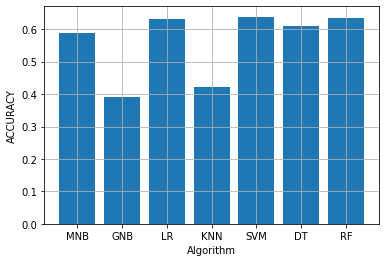

In [65]:
plt.bar(x=['MNB','GNB','LR','KNN','SVM','DT','RF'],
        height=[mnb_acc,gnb_acc,lr_acc,knn_acc,
                svm_acc,dt_acc,rf_acc])
plt.xlabel("Algorithm")
plt.ylabel("ACCURACY")
plt.grid()
plt.show()

# TESTING

In [66]:
data_test = pd.read_csv(r"C:\Users\posah\Desktop\TRESURE\PROJECT DATA SCIENCE\lavs\testTweets.csv")

In [67]:
data_test.head()

,Unnamed: 0,textID,text,selected_text
0,0,d60596aed5,any chance of seeing you at a race in germany...,unfortunately
1,1,7812276995,Nite Tweeple. Tomorrow will be day 25 at work.,Nite Tweeple. Tomorrow will be day 25 at work.
2,2,167052ea96,oh no not difficult. It`s just nuts that`s ho...,oh no not difficult.
3,3,3fa34fee4a,we will work on that mama sweetdreams!,we will work on that mama sweetdreams!
4,4,9bf41d3d1d,Ugh i hate photobucket! an amazing place to ed...,Ugh


In [68]:
data_test.isnull().sum()

Unnamed: 0       0
textID           0
text             0
selected_text    0
dtype: int64

In [69]:
data_test.duplicated().sum()

0

In [70]:
def pre_processing(tweets):
    processed_tweets = []
    for i in tweets:
        p = re.sub(r'http\S+|www\S+|@\w+', ' ', i)      #removing links and mentions
        p = re.sub(r'[^A-Za-z]',' ',p)                  #removing special characters and numbers
        p = p.lower()                                   #lowercasing
        p = word_tokenize(p)                            #tokenization
        p = [i for i in p if i not in sw]               #removing stopwords
        p = [lm.lemmatize(i) for i in p]                #lemmatization
        p = ' '.join(p)
        processed_tweets.append(p)
    return processed_tweets

In [71]:
pre_tweets = pre_processing(data_test['text'])

In [72]:
tf_idf = TfidfVectorizer()
test_features = tf_idf.fit_transform(pre_tweets).toarray()
print(test_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [73]:
import numpy as np

In [74]:
le = features[0].shape
ret = np.empty((0,le[0]), float)
for i in test_features:
    zeros_array = np.zeros(le[0] - test_features[0].shape[0])
    lolo = np.concatenate((i, zeros_array))
    ret = np.vstack((ret, lolo))
ret

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
ret.shape

(723, 8102)

In [76]:
pred = svm.predict(ret)

In [77]:
res = []
for i in pred:
    if i==0.0:
        res.append('negative')
    elif i==1.0:
        res.append('positive')
    else:
        res.append('neutral')
data_test['predicted_emotion'] = res

In [78]:
data_test.to_csv(r"C:\Users\posah\Downloads\twitterpredicted.csv")

In [79]:
def pred_tweet(tweet):
    p = re.sub(r'http\S+|www\S+|@\w+', ' ', tweet)      #removing links and mentions
    p = re.sub(r'[^A-Za-z]',' ',p)                  #removing special characters and numbers
    p = p.lower()                                   #lowercasing
    p = word_tokenize(p)                            #tokenization
    p = [i for i in p if i not in sw]               #removing stopwords
    p = [lm.lemmatize(i) for i in p]                #lemmatization
    p = ' '.join(p)
    
    test_features = tf_idf.fit_transform(pre_tweets).toarray()

    ret = np.empty((0,le[0]), float)
    for i in test_features:
        zeros_array = np.zeros(le[0] - test_features[0].shape[0])
        lolo = np.concatenate((i, zeros_array))
        ret = np.vstack((ret, lolo))
    
    
    pred = svm.predict(ret)
    if pred[0]==0.0:
        return 'negative'
    elif pred[0]==2.0:
        return 'neutral'
    else:
        return 'positive'

In [80]:
print(pred_tweet("as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff"))

neutral


In [82]:
print(pred_tweet("HAPPY MOTHERS DAY.!")) 

neutral


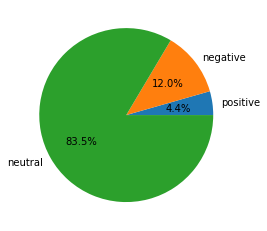

In [89]:
dic = {'positive':0,'negative':0,'neutral':0}
for i in res:
    dic[i] = dic[i] + 1
plt.pie(dic.values(),labels=dic.keys(),autopct='%1.1f%%')
plt.show()

In [92]:
print(pred_tweet("i had a very good day"))
      

neutral
